In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
bank = pd.read_excel('bank-marketing.xlsx')
bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25282,44,services,married,secondary,no,-236,yes,no,cellular,18,nov,218,2,113,7,success,no
10695,54,technician,divorced,unknown,no,1725,no,no,unknown,16,jun,216,3,-1,0,unknown,no
44853,58,technician,married,secondary,no,99,no,no,telephone,22,sep,396,2,-1,0,unknown,yes
41120,67,retired,married,unknown,no,696,no,no,telephone,17,aug,119,1,105,2,failure,no
33657,29,admin.,married,primary,no,131,yes,no,cellular,20,apr,353,4,-1,0,unknown,no
31440,31,blue-collar,married,primary,no,620,no,no,cellular,30,mar,95,1,-1,0,unknown,no
9091,44,services,married,unknown,no,67,yes,no,unknown,5,jun,202,1,-1,0,unknown,no
36926,38,technician,divorced,secondary,no,5733,yes,no,cellular,12,may,173,8,278,4,failure,no
18715,61,retired,divorced,secondary,no,410,no,yes,cellular,31,jul,470,4,-1,0,unknown,no
32814,44,technician,married,secondary,no,-372,yes,no,cellular,17,apr,211,3,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.describe(include = 'object').transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [6]:
bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [7]:
bank[bank.duplicated]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
age_range_list = []
for age in bank['age']:
    if age < 30:
        age_range_list.append('under 30')
    elif age >= 30 and age < 40:
        age_range_list.append('30-39')
    elif age >= 40 and age < 60:
        age_range_list.append('40-59')
    else:
        age_range_list.append('60 and older')
bank['age_range'] = age_range_list

age_y = pd.crosstab(bank.y, bank.age_range)
age_y = age_y.transpose().reset_index()
age_y['percent'] = age_y['yes'] / (age_y['yes'] + age_y['no'])
age_y

In [ ]:
job_y = pd.crosstab(bank.y, bank.job)
job_y = job_y.transpose().reset_index()
job_y['percent'] = job_y['yes'] / (job_y['yes'] + job_y['no'])
job_y

### 1. Remove outlier by using IQR

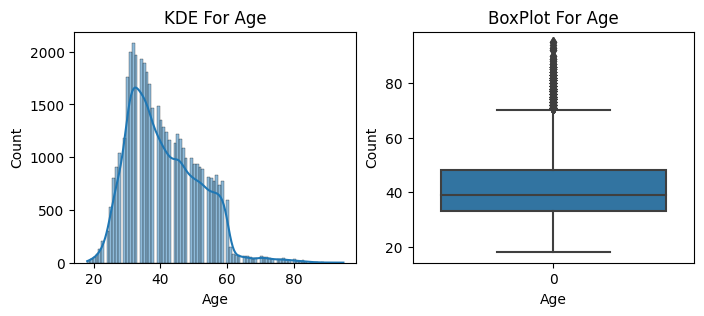

In [8]:
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
sns.histplot(bank.age, kde = True)
plt.title('KDE For Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(bank.age)
plt.title('BoxPlot For Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [9]:
Q1 = np.percentile(bank.age, 25)
Q3 = np.percentile(bank.age, 75)
IQR = Q3 - Q1
MAX = Q3 + IQR * 1.5
MIN = Q1 - IQR * 1.5
bank.age[bank.age > MAX] = MAX
bank.age[bank.age < MIN] = MIN
Q1, Q3, IQR, MAX, MIN

C:\Users\BAO HAN\AppData\Local\Temp\ipykernel_23524\3957423029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.age[bank.age > MAX] = MAX


(33.0, 48.0, 15.0, 70.5, 10.5)

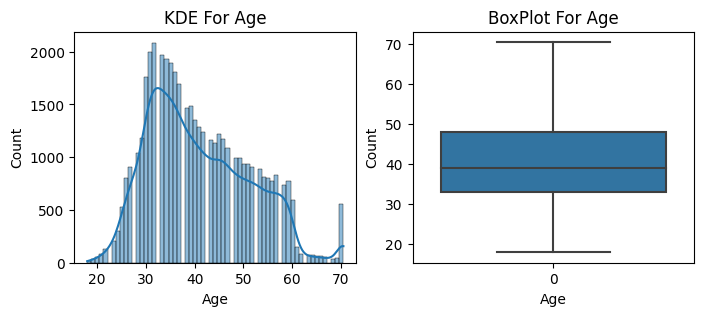

In [10]:
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
sns.histplot(bank.age, kde = True)
plt.title('KDE For Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(bank.age)
plt.title('BoxPlot For Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 2. Label encoding for each object data type

In [ ]:
encoder = bank.copy()

In [ ]:
for col in encoder.select_dtypes(include = 'object').columns:
    print(f"{col}: {encoder[col].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [ ]:
for col in encoder.select_dtypes(include = 'object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(encoder[col].unique())
    encoder[col] = label_encoder.transform(encoder[col])
    print(f"{col}: {encoder[col].unique()}")

job: [ 4  9  2  1 11  5  0  7  6 10  3  8]
marital: [1 2 0]
education: [2 1 3 0]
default: [0 1]
housing: [1 0]
loan: [0 1]
contact: [2 0 1]
month: [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome: [3 0 1 2]
y: [0 1]


In [ ]:
X = encoder.iloc[:,0:16]
y = encoder['y']
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44.0,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33.0,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47.0,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33.0,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825,0,0,0,17,9,643,3,-1,0,3
45207,70.5,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,70.5,5,1,1,0,3462,0,0,0,17,9,643,5,184,3,2
45209,57.0,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = encoder.iloc[:,0:16].columns)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.761905,0.363636,0.5,0.666667,0.0,0.756822,1.0,0.0,1.0,0.133333,0.727273,0.405910,0.0,0.000000,0.000000,1.000000
1,0.495238,0.818182,1.0,0.333333,0.0,0.367072,1.0,0.0,1.0,0.133333,0.727273,0.234837,0.0,0.000000,0.000000,1.000000
2,0.285714,0.181818,0.5,0.333333,0.0,0.362094,1.0,1.0,1.0,0.133333,0.727273,0.118196,0.0,0.000000,0.000000,1.000000
3,0.552381,0.090909,0.5,1.000000,0.0,0.639381,1.0,0.0,1.0,0.133333,0.727273,0.143079,0.0,0.000000,0.000000,1.000000
4,0.285714,1.000000,1.0,1.000000,0.0,0.361910,0.0,0.0,1.0,0.133333,0.727273,0.307932,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.628571,0.818182,0.5,0.666667,0.0,0.513827,0.0,0.0,0.0,0.533333,0.818182,1.000000,0.4,0.000000,0.000000,1.000000
45207,1.000000,0.454545,0.0,0.000000,0.0,0.680494,0.0,0.0,0.0,0.533333,0.818182,0.709176,0.2,0.000000,0.000000,1.000000
45208,1.000000,0.454545,0.5,0.333333,0.0,1.000000,0.0,0.0,0.0,0.533333,0.818182,1.000000,0.8,0.212156,0.010909,0.666667
45209,0.742857,0.090909,0.5,0.333333,0.0,0.484882,0.0,0.0,0.5,0.533333,0.818182,0.790047,0.6,0.000000,0.000000,1.000000


In [ ]:
histogram = X.copy()
histogram['y'] = y.copy()
histogram

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.761905,0.363636,0.5,0.666667,0.0,0.756822,1.0,0.0,1.0,0.133333,0.727273,0.405910,0.0,0.000000,0.000000,1.000000,0
1,0.495238,0.818182,1.0,0.333333,0.0,0.367072,1.0,0.0,1.0,0.133333,0.727273,0.234837,0.0,0.000000,0.000000,1.000000,0
2,0.285714,0.181818,0.5,0.333333,0.0,0.362094,1.0,1.0,1.0,0.133333,0.727273,0.118196,0.0,0.000000,0.000000,1.000000,0
3,0.552381,0.090909,0.5,1.000000,0.0,0.639381,1.0,0.0,1.0,0.133333,0.727273,0.143079,0.0,0.000000,0.000000,1.000000,0
4,0.285714,1.000000,1.0,1.000000,0.0,0.361910,0.0,0.0,1.0,0.133333,0.727273,0.307932,0.0,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.628571,0.818182,0.5,0.666667,0.0,0.513827,0.0,0.0,0.0,0.533333,0.818182,1.000000,0.4,0.000000,0.000000,1.000000,1
45207,1.000000,0.454545,0.0,0.000000,0.0,0.680494,0.0,0.0,0.0,0.533333,0.818182,0.709176,0.2,0.000000,0.000000,1.000000,1
45208,1.000000,0.454545,0.5,0.333333,0.0,1.000000,0.0,0.0,0.0,0.533333,0.818182,1.000000,0.8,0.212156,0.010909,0.666667,1
45209,0.742857,0.090909,0.5,0.333333,0.0,0.484882,0.0,0.0,0.5,0.533333,0.818182,0.790047,0.6,0.000000,0.000000,1.000000,0


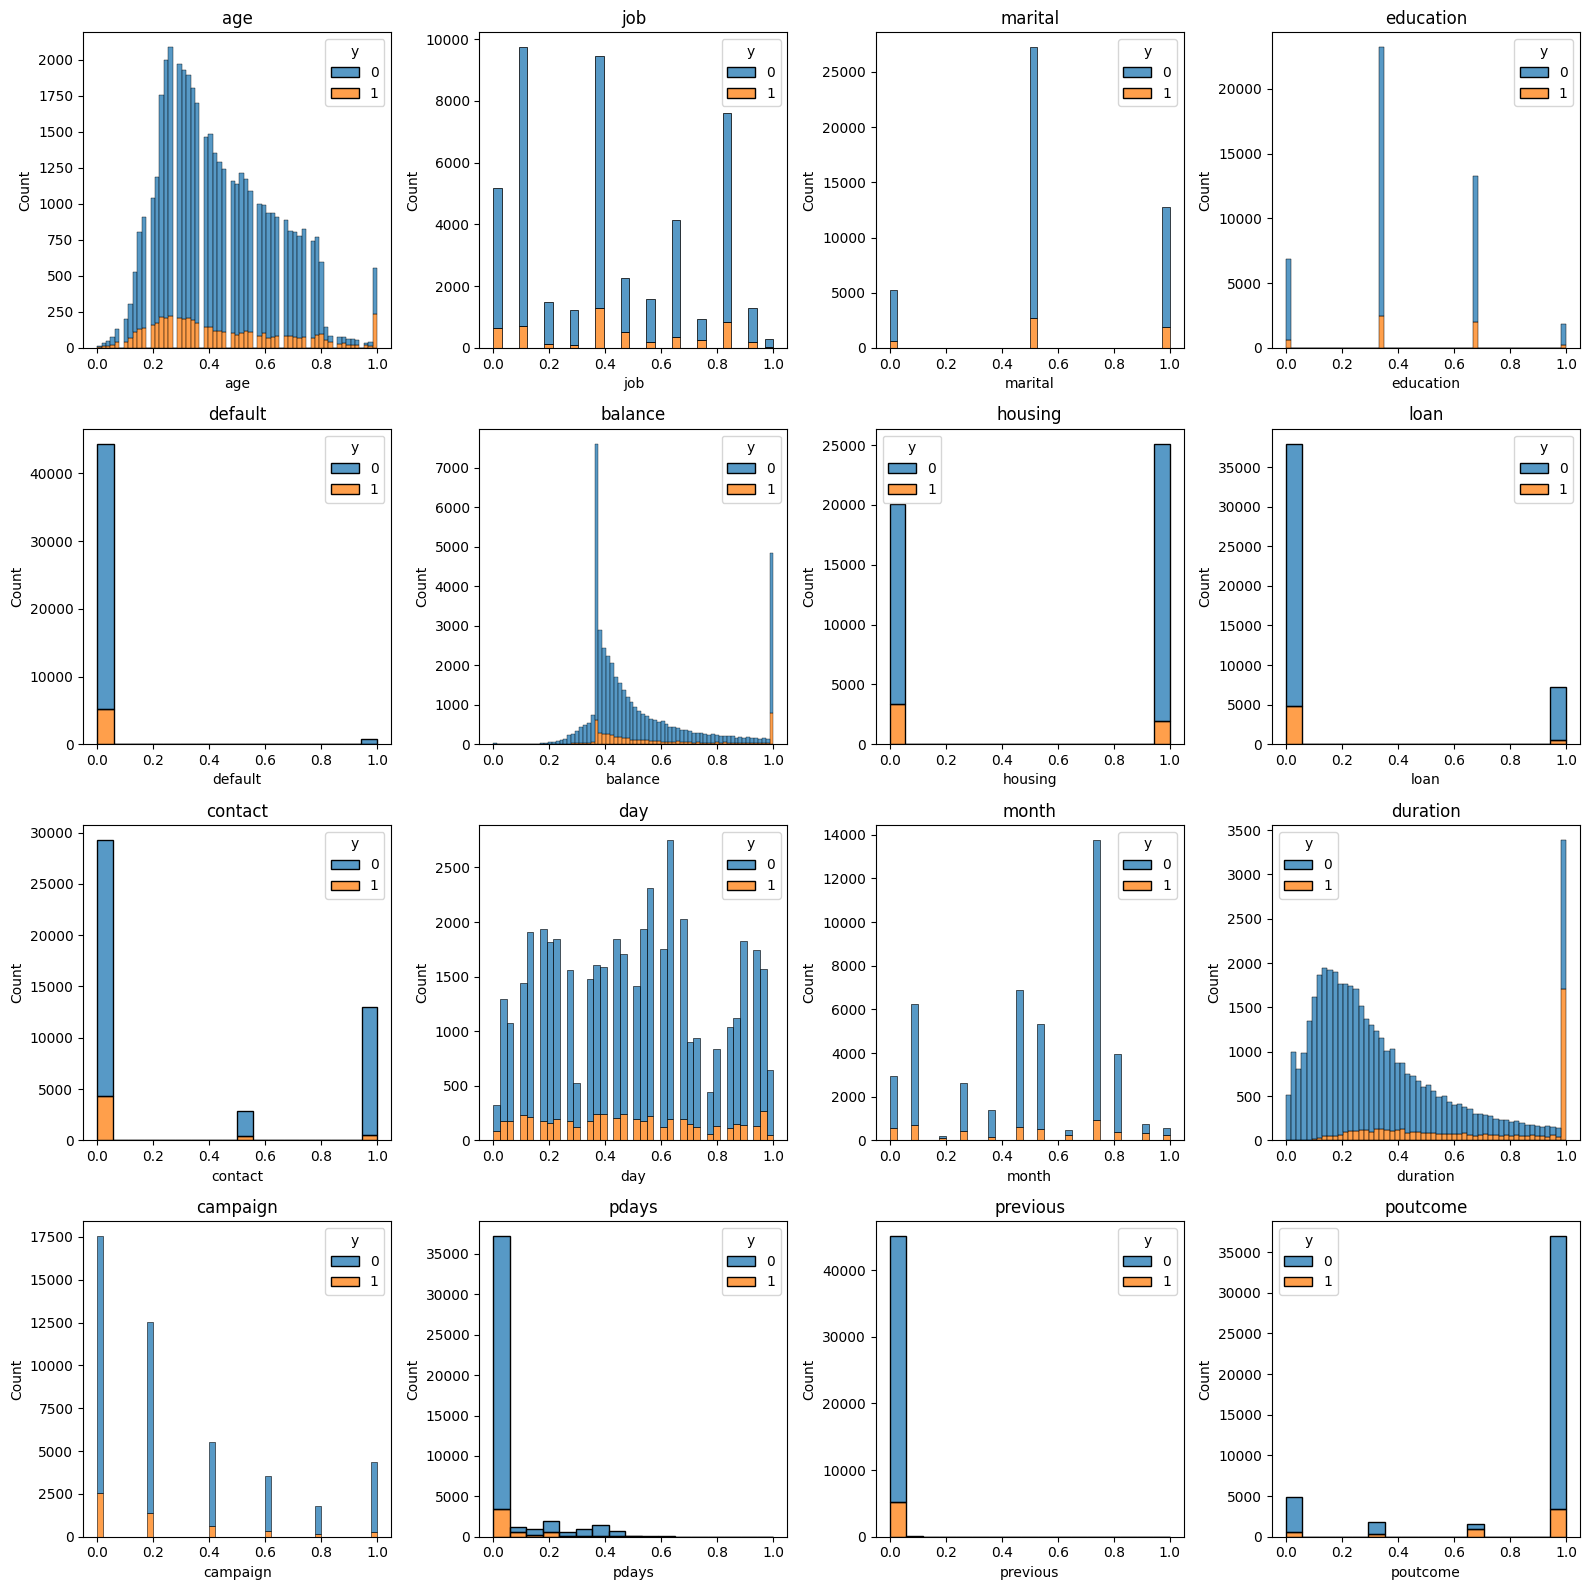

In [ ]:
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
axs = axs.flatten()

categorical_columns = histogram.iloc[:, 0:16].columns

for i, column in enumerate(categorical_columns):
    row = i // 4
    col = i % 4
    sns.histplot(data = histogram, x = column, hue = 'y', multiple = 'stack', ax = axs[i])
    axs[i].set_title(column)
    
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize = (18, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()